# CLASIFICACIÓN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

En estos ejemplos no vamos a seguir todo el proceso de un proyecto de machine learning para no extendernos demasiado, pero en un proyecto real hay que seguir todos los pasos.

## EJEMPLO 1: CLASIFICACIÓN BINARIA

Vamos a crear un clasificador binario que dentro del conjunto MNIST distinga entre 5 y no 5

### RECOPILACIÓN Y PREPARACIÓN  DE LOS DATOS

El conjunto de datos MNIST, es un conjunto de 70.000 imágenes pequeñas de dígitos escritos a mano por alumnos de instituto y empleados de la Oficina del Censo de EEUU. Cada imagen está etiquetada con el dígito al que representa.

Hay 70.000 imágenes y cada imagen tiene 784 características. Esto se debe a que cada imagen tiene 28 × 28 píxeles y cada característica representa simplemente la intensidad de un píxel, desde 0 (blanco) hasta 255 (negro). 

#### OBTENER LOS DATOS

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, parser="auto" )

#### EXPLORAR LOS DATOS

In [3]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [5]:
X.shape

(70000, 784)

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y.shape

(70000,)

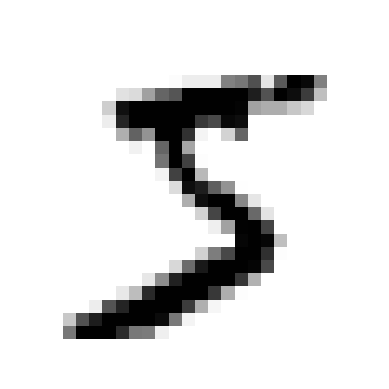

In [8]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [9]:
y[0]

'5'

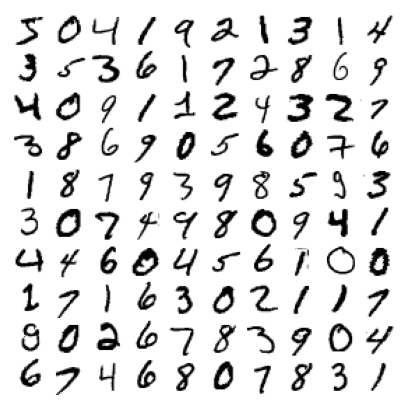

In [10]:
plt.figure(figsize=(5,5))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

#### DIVIDIR LOS DATOS

En realidad, el conjunto de datos MNIST que devuelve fetch_openml() ya está dividido en un conjunto de entrenamiento (las primeras 60.000 imágenes) y un conjunto de prueba (las últimas 10.000)

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### PREPARAR LOS DATOS

In [12]:
y_train_5 = (y_train == '5')  # True para todos los 5s, False para el resto de dígitos
y_test_5 = (y_test == '5')

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Vamos a probar primero con un clasificador de descenso de gradientes estocástico.

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Ya podemos usar el modelo para que prediga si la imagen es un 5 o no

In [14]:
sgd_clf.predict([some_digit])

array([ True])

#### VALIDACIÓN CRUZADA

In [15]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Los resultados so bastantes buenos pero hay que tener en cuenta que la accuracy no es la mejor medida para evaluar un clasificador binario puesto que si esta desequilibrado (hay muchos mas no 5 que 5) o el azar puede llevar a resultados que no sean tan buenos como pensamos.

Vamos a ver otras medidas para la evaluación de nuestro modelo.

#### MATRIZ DE CONFUSIÓN

Para calcular la matriz de confusión, primero hay que tener un conjunto de predicciones para poder compararlas con los objetivos reales. Podemos utilizar la función cross_val_predict().

Vamos a usar X_train e y_train, es decir, de momento sólo estamos evaluando en el conjunto de entrenamiento.

In [16]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

|                   | No 5 (clase predicha) | 5 (clase predicha) |
|-------------------|-----------------------|--------------------|
| No 5 (clase real)	|                 53892	|                687 |
| 5 (clase real)	|                  1891	|               3530 |


#### PRECISIÓN  Y SENSIBILIDAD

Podemos fijarnos es la exactitud de las predicciones positivas, es decir, en la precisición del clasificador.

In [18]:
precision_score(y_train_5, y_train_pred)  #precision == 3530 / (687 + 3530)

0.8370879772350012

También podemos fijarnos en la tadas de verdaderos positivos, es decir, en la sensibilidad

In [19]:
recall_score(y_train_5, y_train_pred)  #sensibilidad == 3530 / (1891 + 3530)

0.6511713705958311

Cuando afirma que una imagen representa un 5, solo está en lo cierto el 83,7% de las veces. Además, solo detecta el 65,1% de los cincos. A menudo, es conveniente combinar precisión y sensibilidad en una sola métrica llamada valor F1, sobre todo cuando necesitas una sola métrica para comparar dos clasificadores.

In [20]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

#### CURVA DE ROC Y AUC (ÁREA BAJO LA CURVA DE ROC)

La función cross_val_predict realiza predicciones utilizando la técnica de validación cruzada (cross-validation) para cada punto de datos del conjunto de entrenamiento y si le añadimos el parametro method="decision_function" obtiene una puntuación en lugar de etiquetas de clase finales. Estas puntuaciones representan la confianza o probabilidad de que una instancia pertenezca a una clase específica, y pueden usarse para calcular métricas más avanzadas como la Curva ROC.

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [22]:
fpr, tpr, _ = roc_curve(y_train_5, y_train_pred)

In [23]:
roc_auc = auc(fpr, tpr)
roc_auc

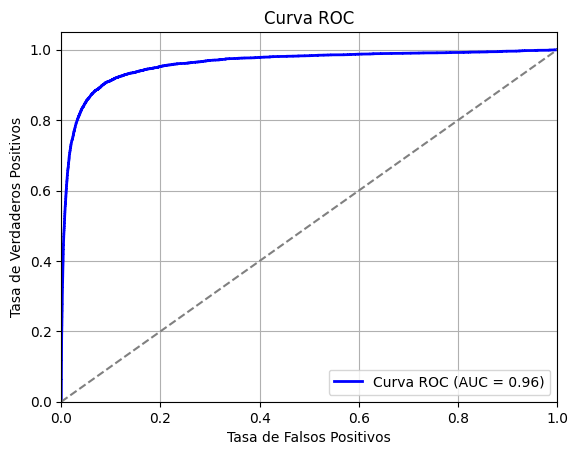

In [24]:
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Vamos a hacer los mismo pero vamos a usar ahora Random Forest

In [25]:
forest_clf = RandomForestClassifier(random_state=42)

In [26]:
y_train_forest_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [27]:
cm = confusion_matrix(y_train_5, y_train_forest_pred)
cm

array([[54534,    45],
       [  725,  4696]])

In [28]:
precision_score(y_train_5, y_train_forest_pred)

0.9905083315756169

In [29]:
recall_score(y_train_5, y_train_forest_pred)

0.8662608374838591

In [30]:
f1_score(y_train_5, y_train_forest_pred)

0.9242275142688448

In [31]:
y_train_forest_pred = cross_val_predict(
    sgd_clf, X_train, y_train_forest_pred, cv=3, method="decision_function"
)

In [32]:
fpr, tpr, _ = roc_curve(y_train_5, y_train_forest_pred)

In [50]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9679409080036327

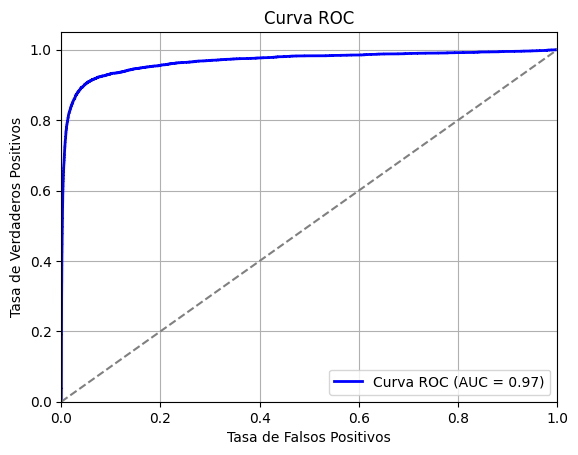

In [34]:
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Claramente este modelo es mejor y deberíamos pasar a la fase de optimización.

## EJEMPLO 2: CLASIFICADOR MULTICLASE

Vamos a crear un clasificador multiclase que dentro del conjunto MNIST nos diga que número del 0 al 9 es.

En este caso vamos a trabajar con y_train y y_test (en vez de y_train_5 y y_test_5).

Vamos a usar el modelo másquina de vectores de soporte (SVC)

### ENTRENAMIENTO Y EVALUACIÓN

In [35]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)  
#Si queremos que tarde menos
#svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [36]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

Si llamamos al método decision_function(), veremos que devuelve 10 puntuaciones por instancia: una por clase. Cada clase obtiene una puntuación igual al número de duelos ganados más o menos un pequeño ajuste (máx. ± 0,33) para deshacer empates basándose en los resultados del clasificador: 

In [37]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 1.73,  2.73,  7.25,  8.31, -0.31,  9.31,  1.71,  2.77,  6.23,
         4.85]])

La puntuación más alta es 9,3 y es, de hecho, la que se corresponde con la clase 5.

In [38]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [39]:
class_id = some_digit_scores.argmax()
svm_clf.classes_[class_id]

'5'

#### EXACTITUD

Podemos usar la función cross_val_score() con el scoring="accuracy" para evaluar el modelo con la métrica de exactitud: 

In [40]:
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.977 , 0.9738, 0.9739])

#### MATRIZ DE CONFUSIÓN

Vamos a fijarnos en la matriz de confusión.

Para esto, primero necesitamos hacer predicciones usando la función cross_val_predict(); después, podemos pasar las etiquetas y predicciones a la función confusion_matrix(), igual que hemos hecho antes. Sin embargo, como ahora hay 10 clases en vez de 2, la matriz de confusión contendrá muchos números y puede ser difícil de leer. Un diagrama de colores de la matriz de confusión, normalizarla y utilizar porcentajes en vez de números hace que la matriz sea mucho más fácil de analizar.

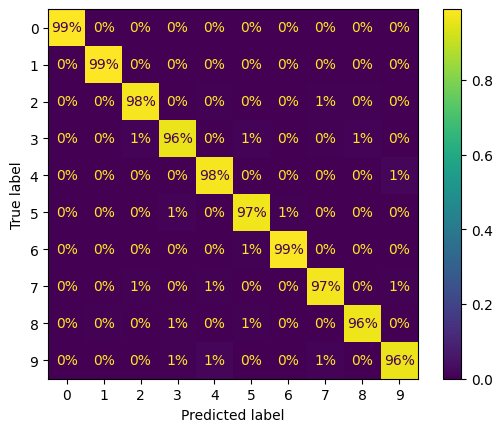

In [41]:
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(
    y_train, y_train_pred, normalize="true", values_format=".0%"
)
plt.show()

Analizar la matriz de confusión a menudo da una perspectiva sobre las maneras de mejorar el clasificador. Si nos fijamos en estos gráficos, parece que deberíamos centrar nuestros esfuerzos en reducir los falsos ochos. Por ejemplo, podemos intentar reunir más datos de entrenamiento de dígitos que parezcan ochos (sin serlo) para que el clasificador aprenda a distinguirlos de los ochos de verdad. También podríamos preprocesar las imágenes para hacer que algunos patrones, como los círculos cerrados, destaquen más. 

## EJEMPLO 3: CLASIFICADOR MULTIETIQUETA

Vamos a echar un vistazo a un ejemplo sencillo, con fines ilustrativos.

Vamos a seguir utilizando el conjunto de datos MNIST, pero ahora queremos un clasificador que identifique dos caracteriscas: si un número es grande (7, 8 y 9) y si es impar.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### PREPARAR LOS DATOS

El siguiente código crea una matriz y_multilabel que contiene dos etiquetas objetivo para cada imagen de dígito; la primera indica si el dígito es o no es grande (7, 8 o 9) y la segunda indica si es o no es impar. 

In [42]:
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

In [43]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [44]:
knn_clf.predict([some_digit])

array([[False,  True]])

#### VALIDACIÓN CRUZADA

In [45]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

#### PRECISIÓN Y SENSIBILIDAD

Hay muchas formas de evaluar un clasificador multietiqueta y, en realidad, seleccionar la métrica adecuada depende del proyecto. 

Un enfoque es medir el valor F1 para cada etiqueta individual (o cualquier otra métrica de clasificadores binarios que hayamos mencionado antes) y, después, calcular la puntuación media. 

In [46]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

## EJEMPLO 4: CLASIFICADOR MULTISALIDA

Se trata de una generalización de la clasificación multietiqueta donde cada etiqueta puede ser multiclase (es decir, puede tener más de dos valores posibles). 

Vamos a seguir trabajando con el conjunto de datos MNIST.

En este caso vamos a crear un sistema que elimina el ruido de las imágenes. Tomará como entrada una imagen con ruido y generará como salida (con suerte) una imagen del dígito limpia, representada como una matriz de intensidades de píxeles. La salida del clasificador es multietiqueta (una etiqueta por píxel) y cada etiqueta tiene múltiples valores (la intensidad de los píxeles va desde 0 hasta 255). 

Por tanto, es un ejemplo de un sistema de clasificación multisalida. 

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

Vamos a empezar por crear los conjuntos de entrenamiento y prueba cogiendo las imágenes MNIST y añadiendo ruido a sus intensidades de píxeles con la función de NumPy randint(). Las imágenes objetivo serán las imágenes originales.

In [47]:
np.random.seed(42) 
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

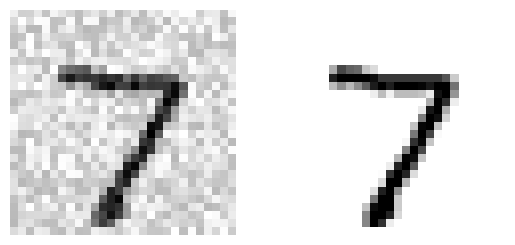

In [48]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Vamos a usar el algoritmo K-Vecinos más cercanos.

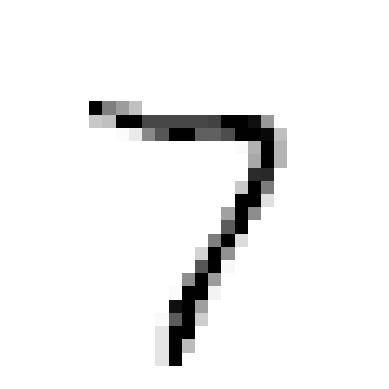

In [49]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()

No vamos a ver como evaluar este modelo (veremos mejores modelos con redes neuronales)